**Step-1
Importing the dataset and required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
city_data = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Air pollution/Datasets/city_day.csv')

In [3]:
city_data


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


**Analyzing the Data**

In [4]:
city_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
city_data.shape

(29531, 16)

In [8]:
city_data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [12]:
city_data.describe(). T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [13]:
city_data.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [14]:
 #This function takes a DataFrame as a parameter and returns a table showing the number of null values ​​in this DataFrame and the percentage of these null values ​​in the total values.def bos_deger_goster(df):
def show_null_value(df):
    mis_val = df.isnull().sum()
    miss_val_percent= 100 * df.isna().sum()/ len(df) # Calculates the percentage of blank values ​​in each column out of the total values. We multiply by 100 to express it as a percentage.
    mis_val_table = pd.concat([mis_val, miss_val_percent], axis=1)# Concatenates the number and percentage of null values ​​into a new DataFrame.
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns # DataFrame'i döndürür.

show_null_value(city_data)

,Missing Values,% of Total Values
City,0,0.000000
Date,0,0.000000
PM2.5,4598,15.570079
PM10,11140,37.723071
NO,3582,12.129626
NO2,3585,12.139785
NOx,4185,14.171549
NH3,10328,34.973418
CO,2059,6.972334
SO2,3854,13.050692


In [15]:
city_data['Date'] = pd.to_datetime(city_data['Date'], format='%Y-%m-%d')
city_data = city_data.sort_values(by = 'Date')

In [16]:
city_data['Date'].min(), city_data['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-07-01 00:00:00'))

In [20]:
city_data.columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [17]:
#visualizing the dataset for better understanding and analysis

<Axes: >

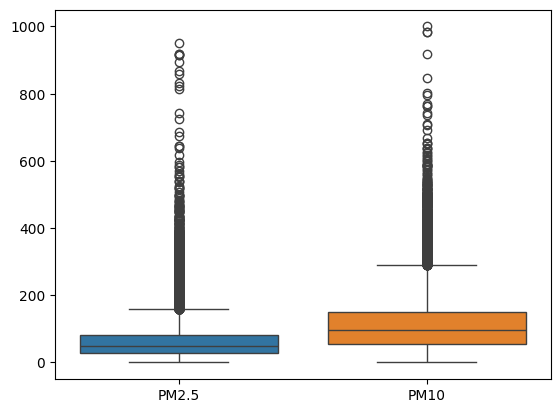

In [23]:
sns.boxplot(data=city_data[[ 'PM2.5', 'PM10']])

<Axes: >

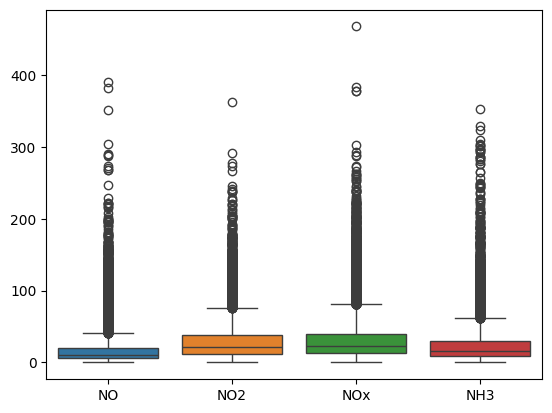

In [24]:
sns.boxplot(data=city_data[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

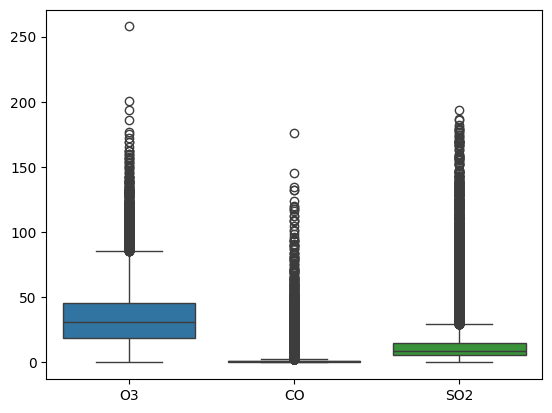

In [25]:
sns.boxplot(data=city_data[[ 'O3', 'CO', 'SO2']])

<Axes: >

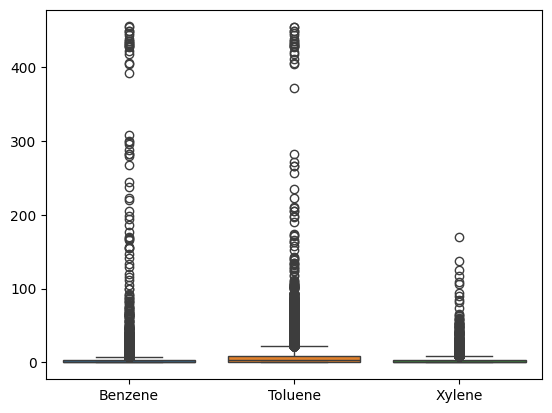

In [26]:
sns.boxplot(data=city_data[[ 'Benzene', 'Toluene', 'Xylene']])

Procedures related to outlier data, missing data, data that has little relationship with our target column
We observed that there were too many outliers in our independent variables. We thought that the modeling we would do with this data would give us incorrect results, so we changed the outliers.

In [29]:
# This function takes a DataFrame as a parameter and identifies outliers for numeric columns in the DataFrame. It replaces these outliers with the corresponding quartile values ​​(Q1 or Q3). Outliers are identified using the interquartile range (IQR).
def replace_outliers_with_quartiles(df):

    for column in city_data.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = city_data[column].quantile(0.25)
        Q3 = city_data[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, we identify outliers and replace them with Q1 or Q3. We do this using a lambda function. If the value is less than the lower bound, it is replaced with Q1. If it is greater than the upper bound, it is replaced with Q3. In the last case, the value is not changed and remains the same.
        city_data[column] = city_data[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )

    return city_data

city_data = replace_outliers_with_quartiles(city_data)

In [30]:
city_data.describe().T


,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,24933.0,54.975923,0.04,28.82,48.57,80.59,158.21,32.781561
PM10,18391.0,104.818086,0.01,56.255,95.68,149.7425,289.95,60.357602
NO,25949.0,12.472491,0.02,5.63,9.89,19.95,41.43,8.941774
NO2,25946.0,25.482607,0.01,11.75,21.69,37.62,76.4,16.698364
NOx,25346.0,26.520383,0.0,12.82,23.52,40.125625,81.06,17.876378
NH3,19203.0,19.661227,0.01,8.58,15.85,30.02,62.16,13.838362
CO,27472.0,0.952485,0.0,0.51,0.89,1.45,2.86,0.61346
SO2,25677.0,10.304869,0.01,5.67,9.16,15.22,29.54,5.908036
O3,25509.0,32.836577,0.01,18.86,30.84,45.57,85.63,17.969539


Now we have removed all the outliers of the data set

<Axes: >

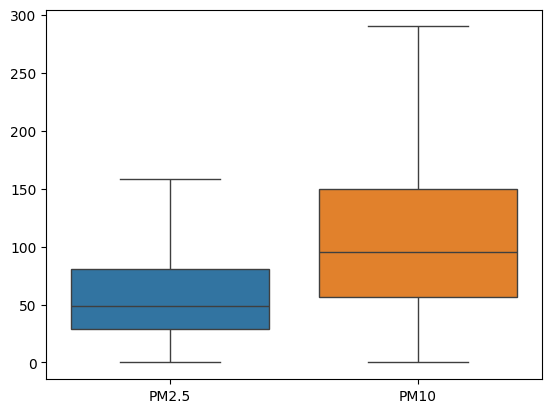

In [31]:
sns.boxplot(data=city_data[[ 'PM2.5', 'PM10']])

<Axes: >

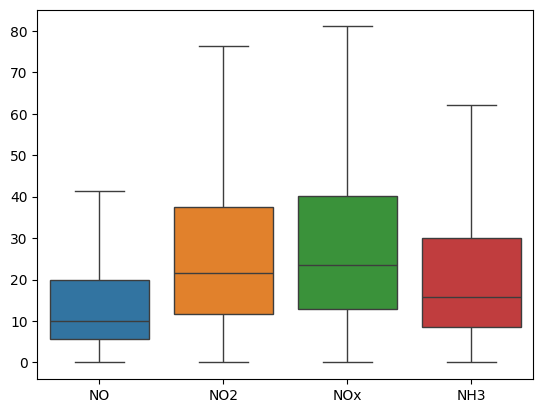

In [32]:
sns.boxplot(data=city_data[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

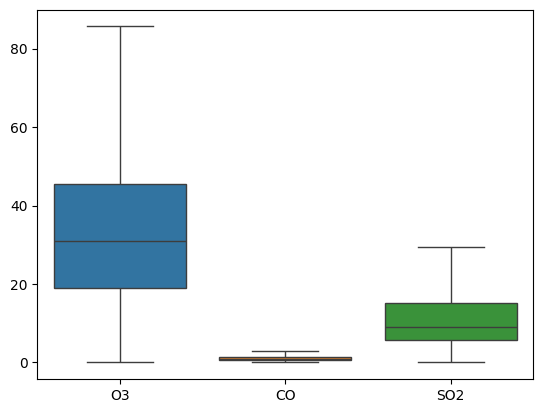

In [33]:
sns.boxplot(data=city_data[[ 'O3', 'CO', 'SO2']])

In [34]:
df=city_data.drop(columns=['City'])

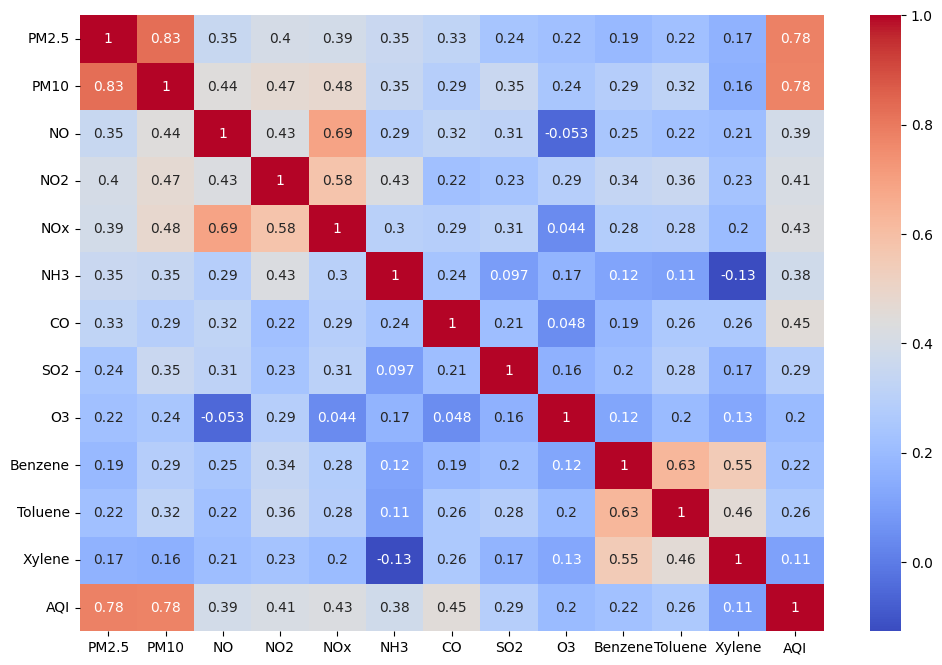

In [36]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

The most important variables affecting the AQI value appear to be PM2.5, PM10, CO and NOx.We will make predictions based on data above 0.25

In [37]:
city_data=city_data.drop(columns=['Xylene', 'Benzene','O3']) #We remove the Xylene, Benzene, O3 columns from df_city_day.

In [38]:
city_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.1500,NaN,0.92,27.64,0.02,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.6800,4.59,1.17,9.20,NaN,NaN,NaN
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.5700,NaN,1.45,15.22,3.93,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.3800,NaN,0.00,NaN,0.00,NaN,NaN


THERE ARE NULL VALUES IN OUR TARGET VARIABLE AQI COLUMN, OUR TARGET COLUMN CANNOT BE EMPTY, THAT IS WHY WE CREATED A NEW DATASET FROM THOSE WITH FULL AQI.

In [39]:
df_full=city_data[city_data['AQI'].notna()]

In [40]:
df_full['Year'] = df_full['Date'].dt.year

<ipython-input-40-f21ccec048a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['Year'] = df_full['Date'].dt.year


In [41]:
df_full.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket,Year
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,Severe,2015
10230,Delhi,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,Severe,2015


In [42]:
show_null_value(df_full)

,Missing Values,% of Total Values
City,0,0.000000
Date,0,0.000000
PM2.5,678,2.728370
PM10,7086,28.515091
NO,387,1.557344
NO2,391,1.573441
NOx,1857,7.472837
NH3,6536,26.301811
CO,445,1.790744
SO2,605,2.434608


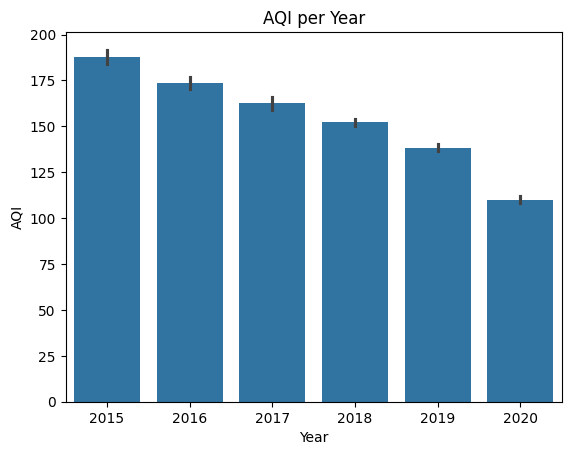

In [43]:
plt.title('AQI per Year')
sns.barplot(x='Year',y='AQI',data=df_full);

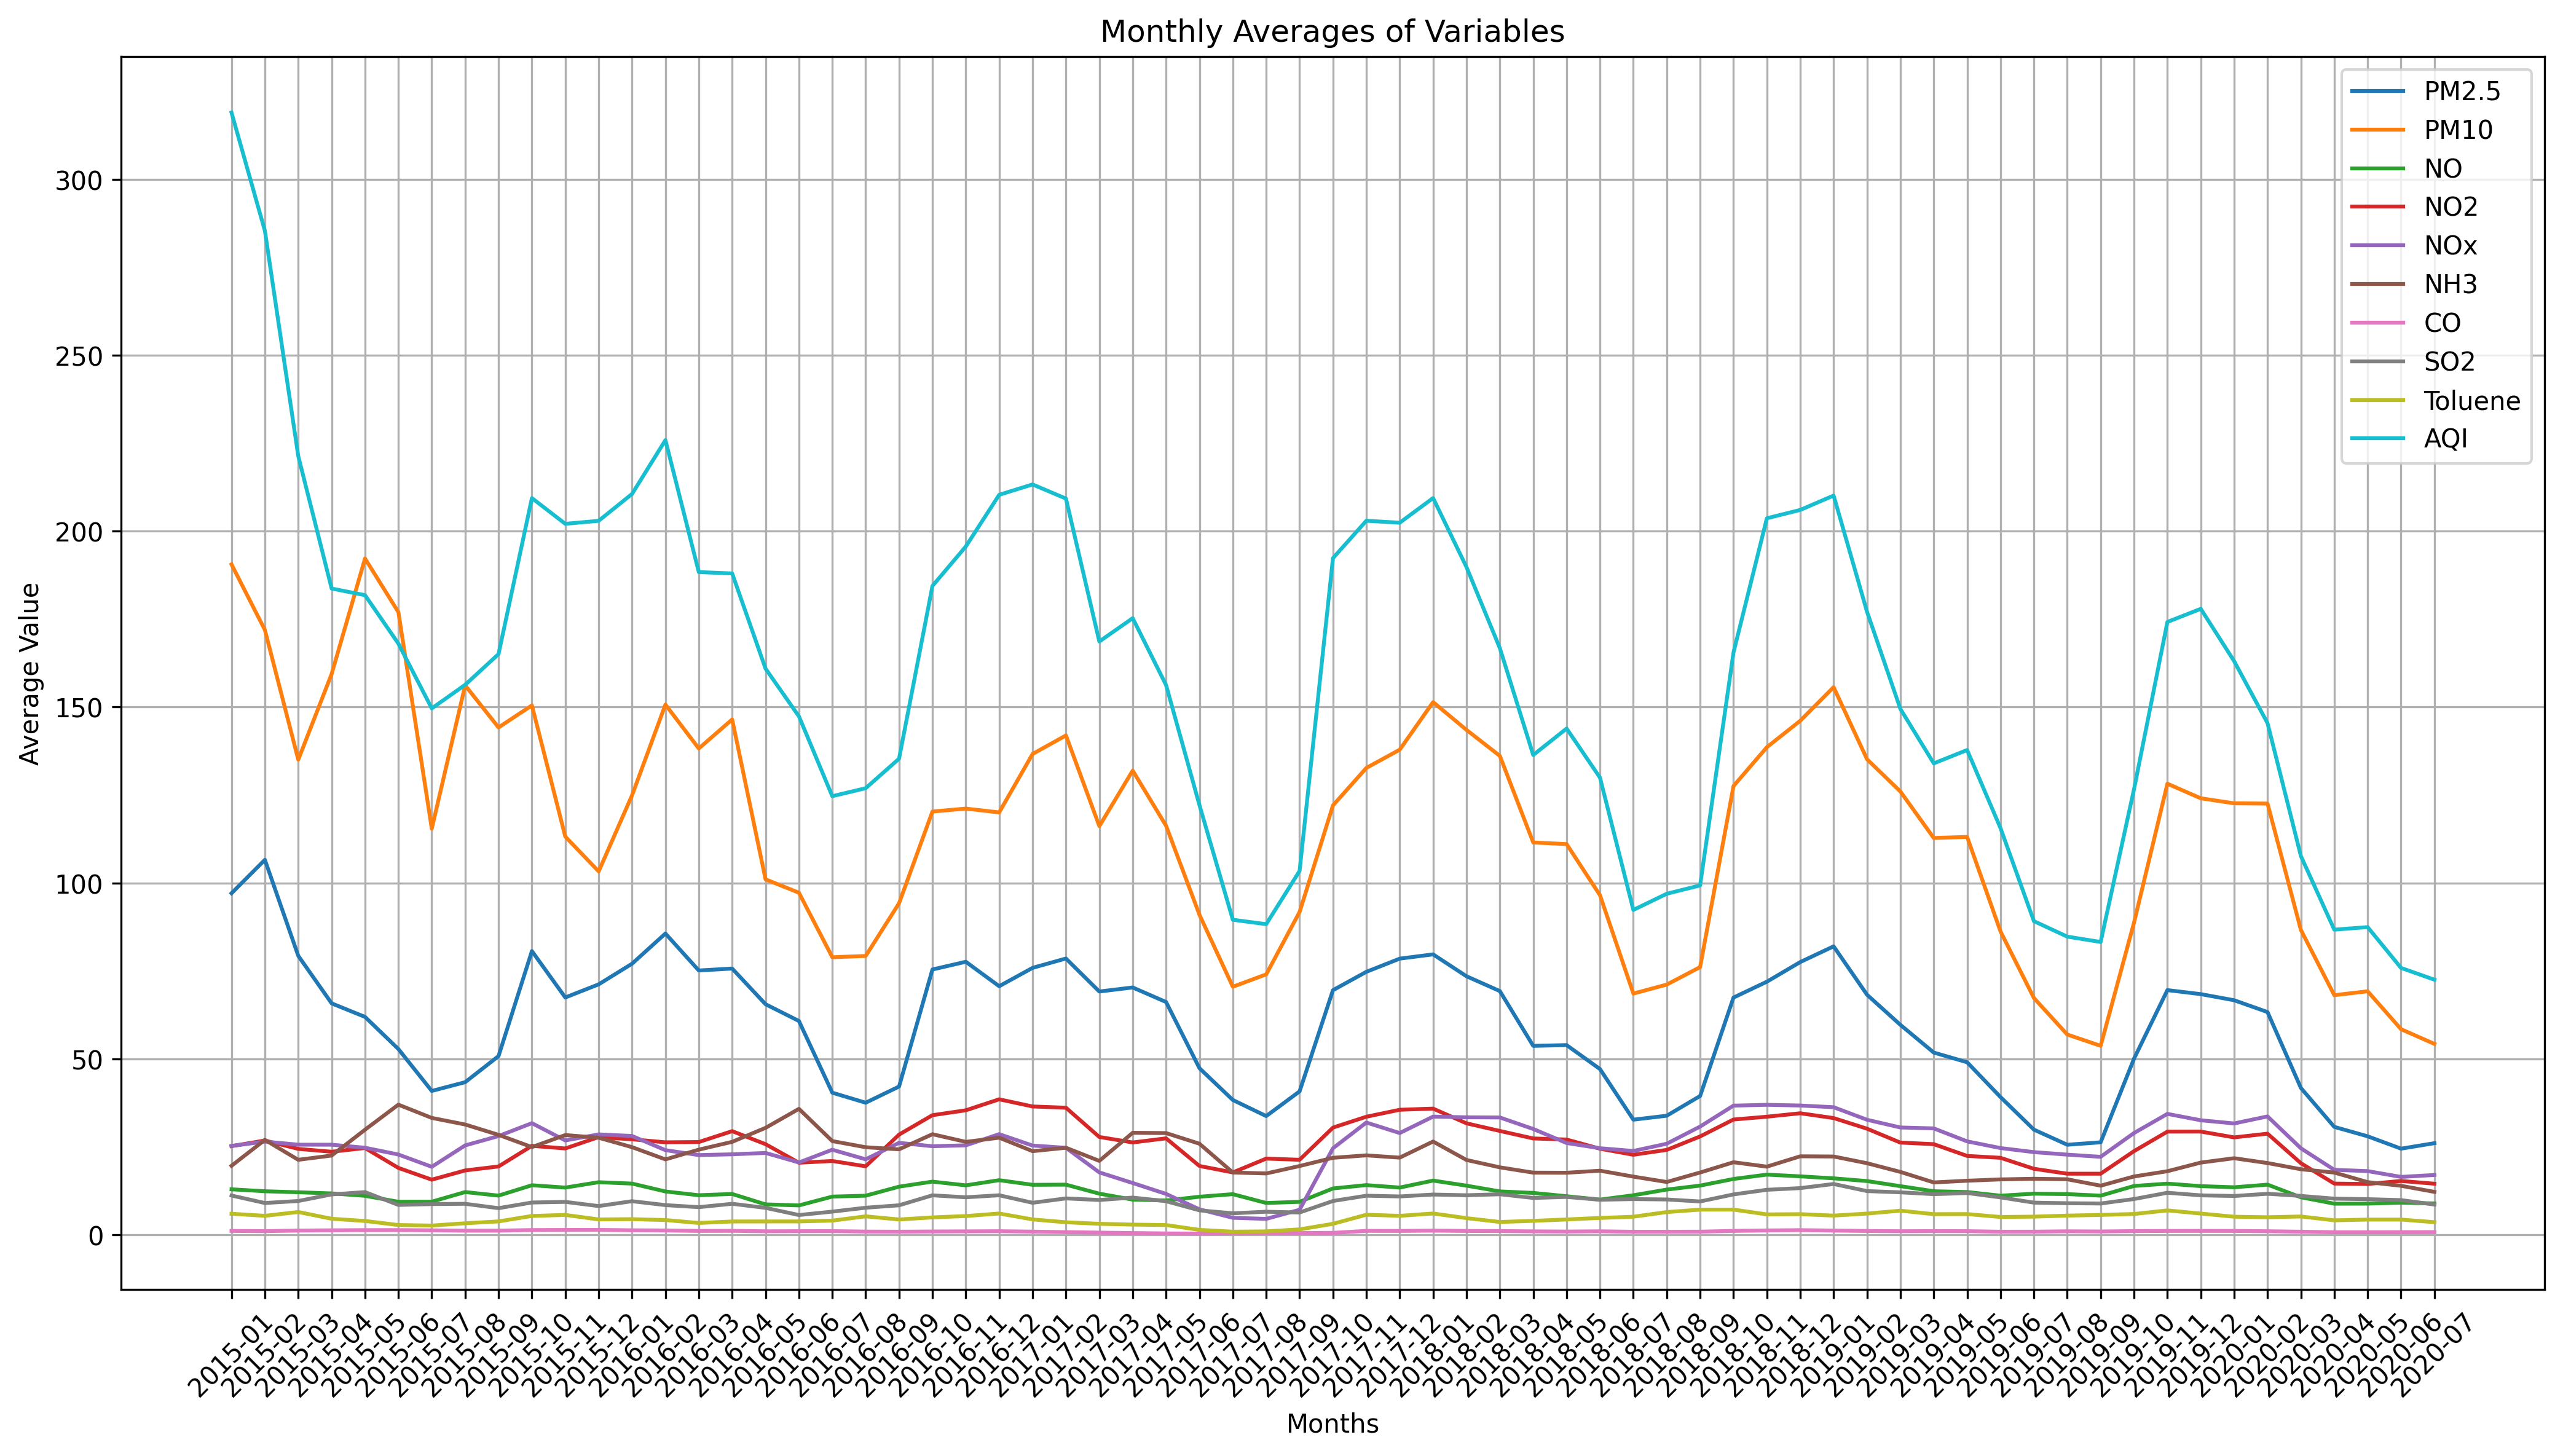

In [45]:
numerical_cols = city_data.select_dtypes(include='number').columns.tolist()
city_data['Month'] =city_data['Date'].dt.to_period('M')
monthly_data = city_data.groupby('Month')[numerical_cols].mean(numeric_only=True)

plt.figure(figsize=(14, 8), dpi=300)
for col in numerical_cols:
    plt.plot(monthly_data.index.astype(str), monthly_data[col], label=col)

plt.xlabel('Months')
plt.ylabel('Average Value')
plt.title('Monthly Averages of Variables')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The line graph above is a graph showing the monthly averages of numerical values ​​such as AQI, PM10, PM2.5, NO, NO2. According to the fluctuations seen here, it can be said that the values ​​​​change according to certain seasonality.

When we look at the seasonal intervals of India, it is seen that December and January coincide with the winter season. It can be said that the AQI value increases as a result of the increase in the use of fuels such as coal, wood, heating devices and vehicles in the winter months.

The fact that June and July coincide with the Monsoon period provides an opportunity for the air to disperse and clean due to the increase in rainfall and winds. For this reason, it can be said that the AQI value decreases and air quality increases.

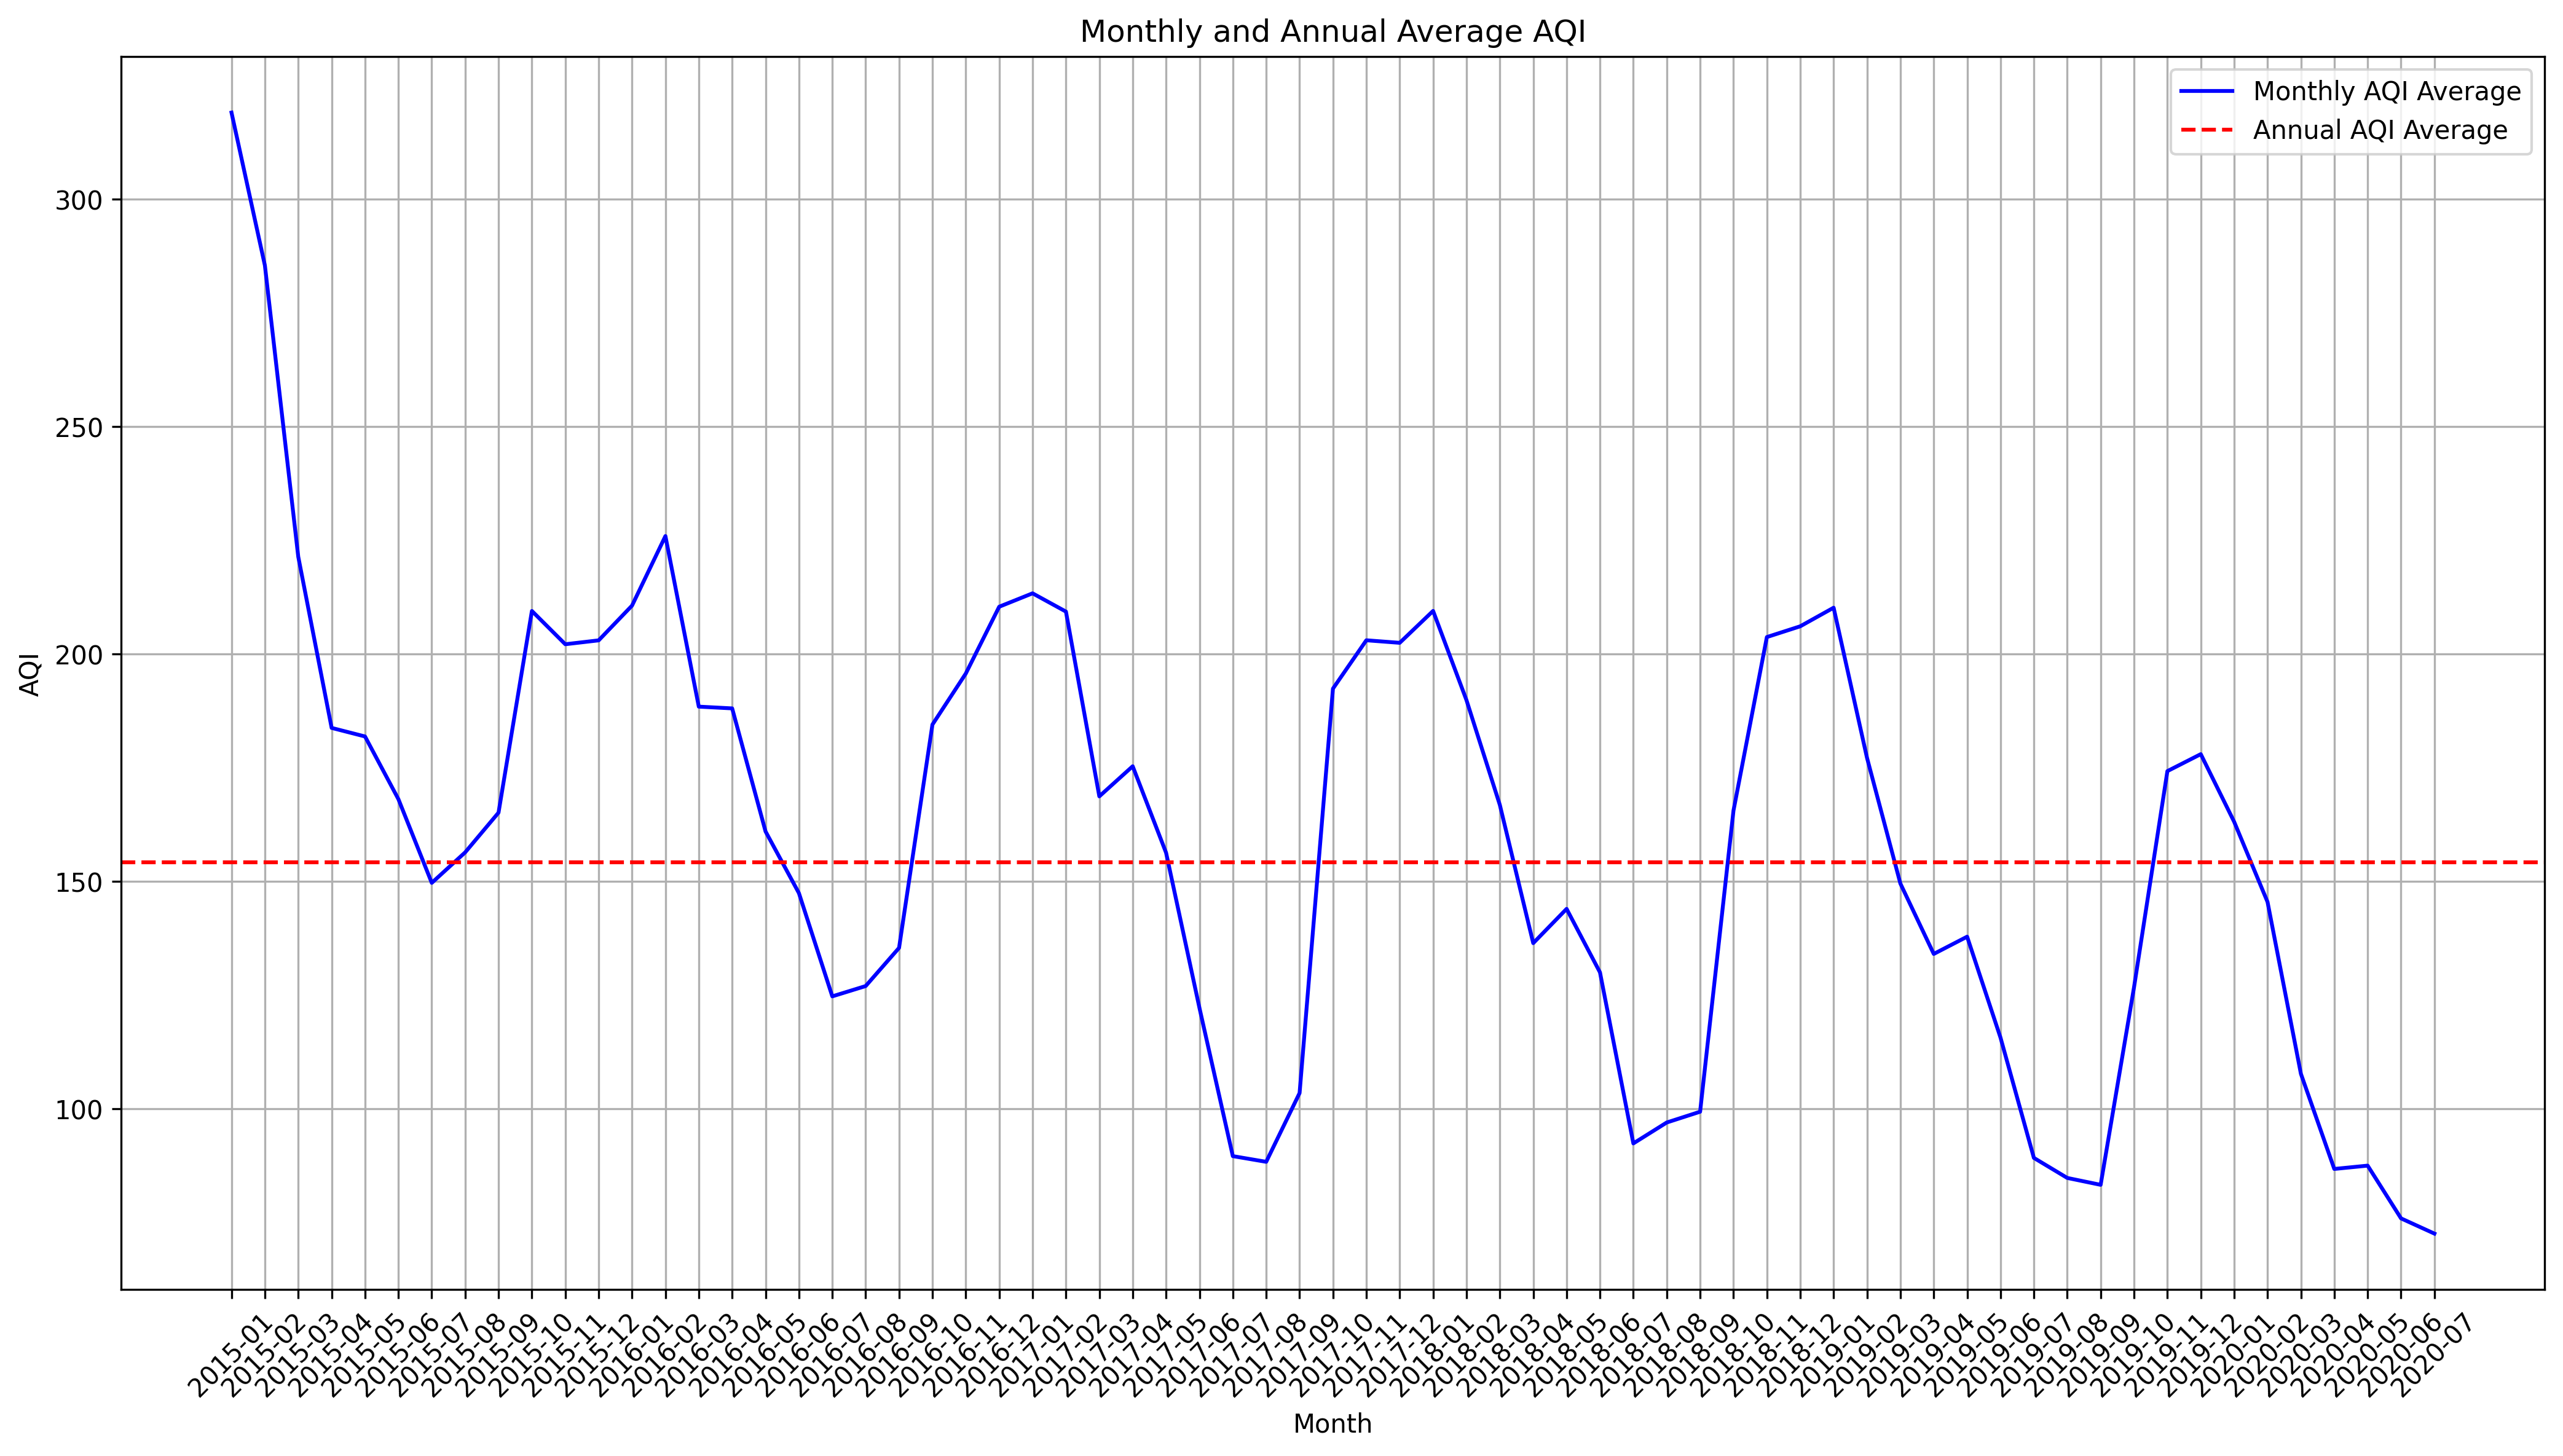

In [46]:
city_data['Month'] = city_data['Date'].dt.to_period('M')
city_data['Year'] = city_data['Date'].dt.year

monthly_aqi = city_data.groupby('Month')['AQI'].mean()

annual_aqi_mean = city_data.groupby('Year')['AQI'].mean()

plt.figure(figsize=(14, 8), dpi=300)

plt.plot(monthly_aqi.index.astype(str), monthly_aqi, label='Monthly AQI Average', color='blue')

plt.axhline(y=annual_aqi_mean.mean(), color='red', linestyle='--', label='Annual AQI Average')

plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Monthly and Annual Average AQI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph here is a line graph showing the monthly averages of the AQI value. When the graph is examined, the AQI value reaches the highest level in December-January and the lowest level in June-July. It can be seen from this graph that seasonality is effective.

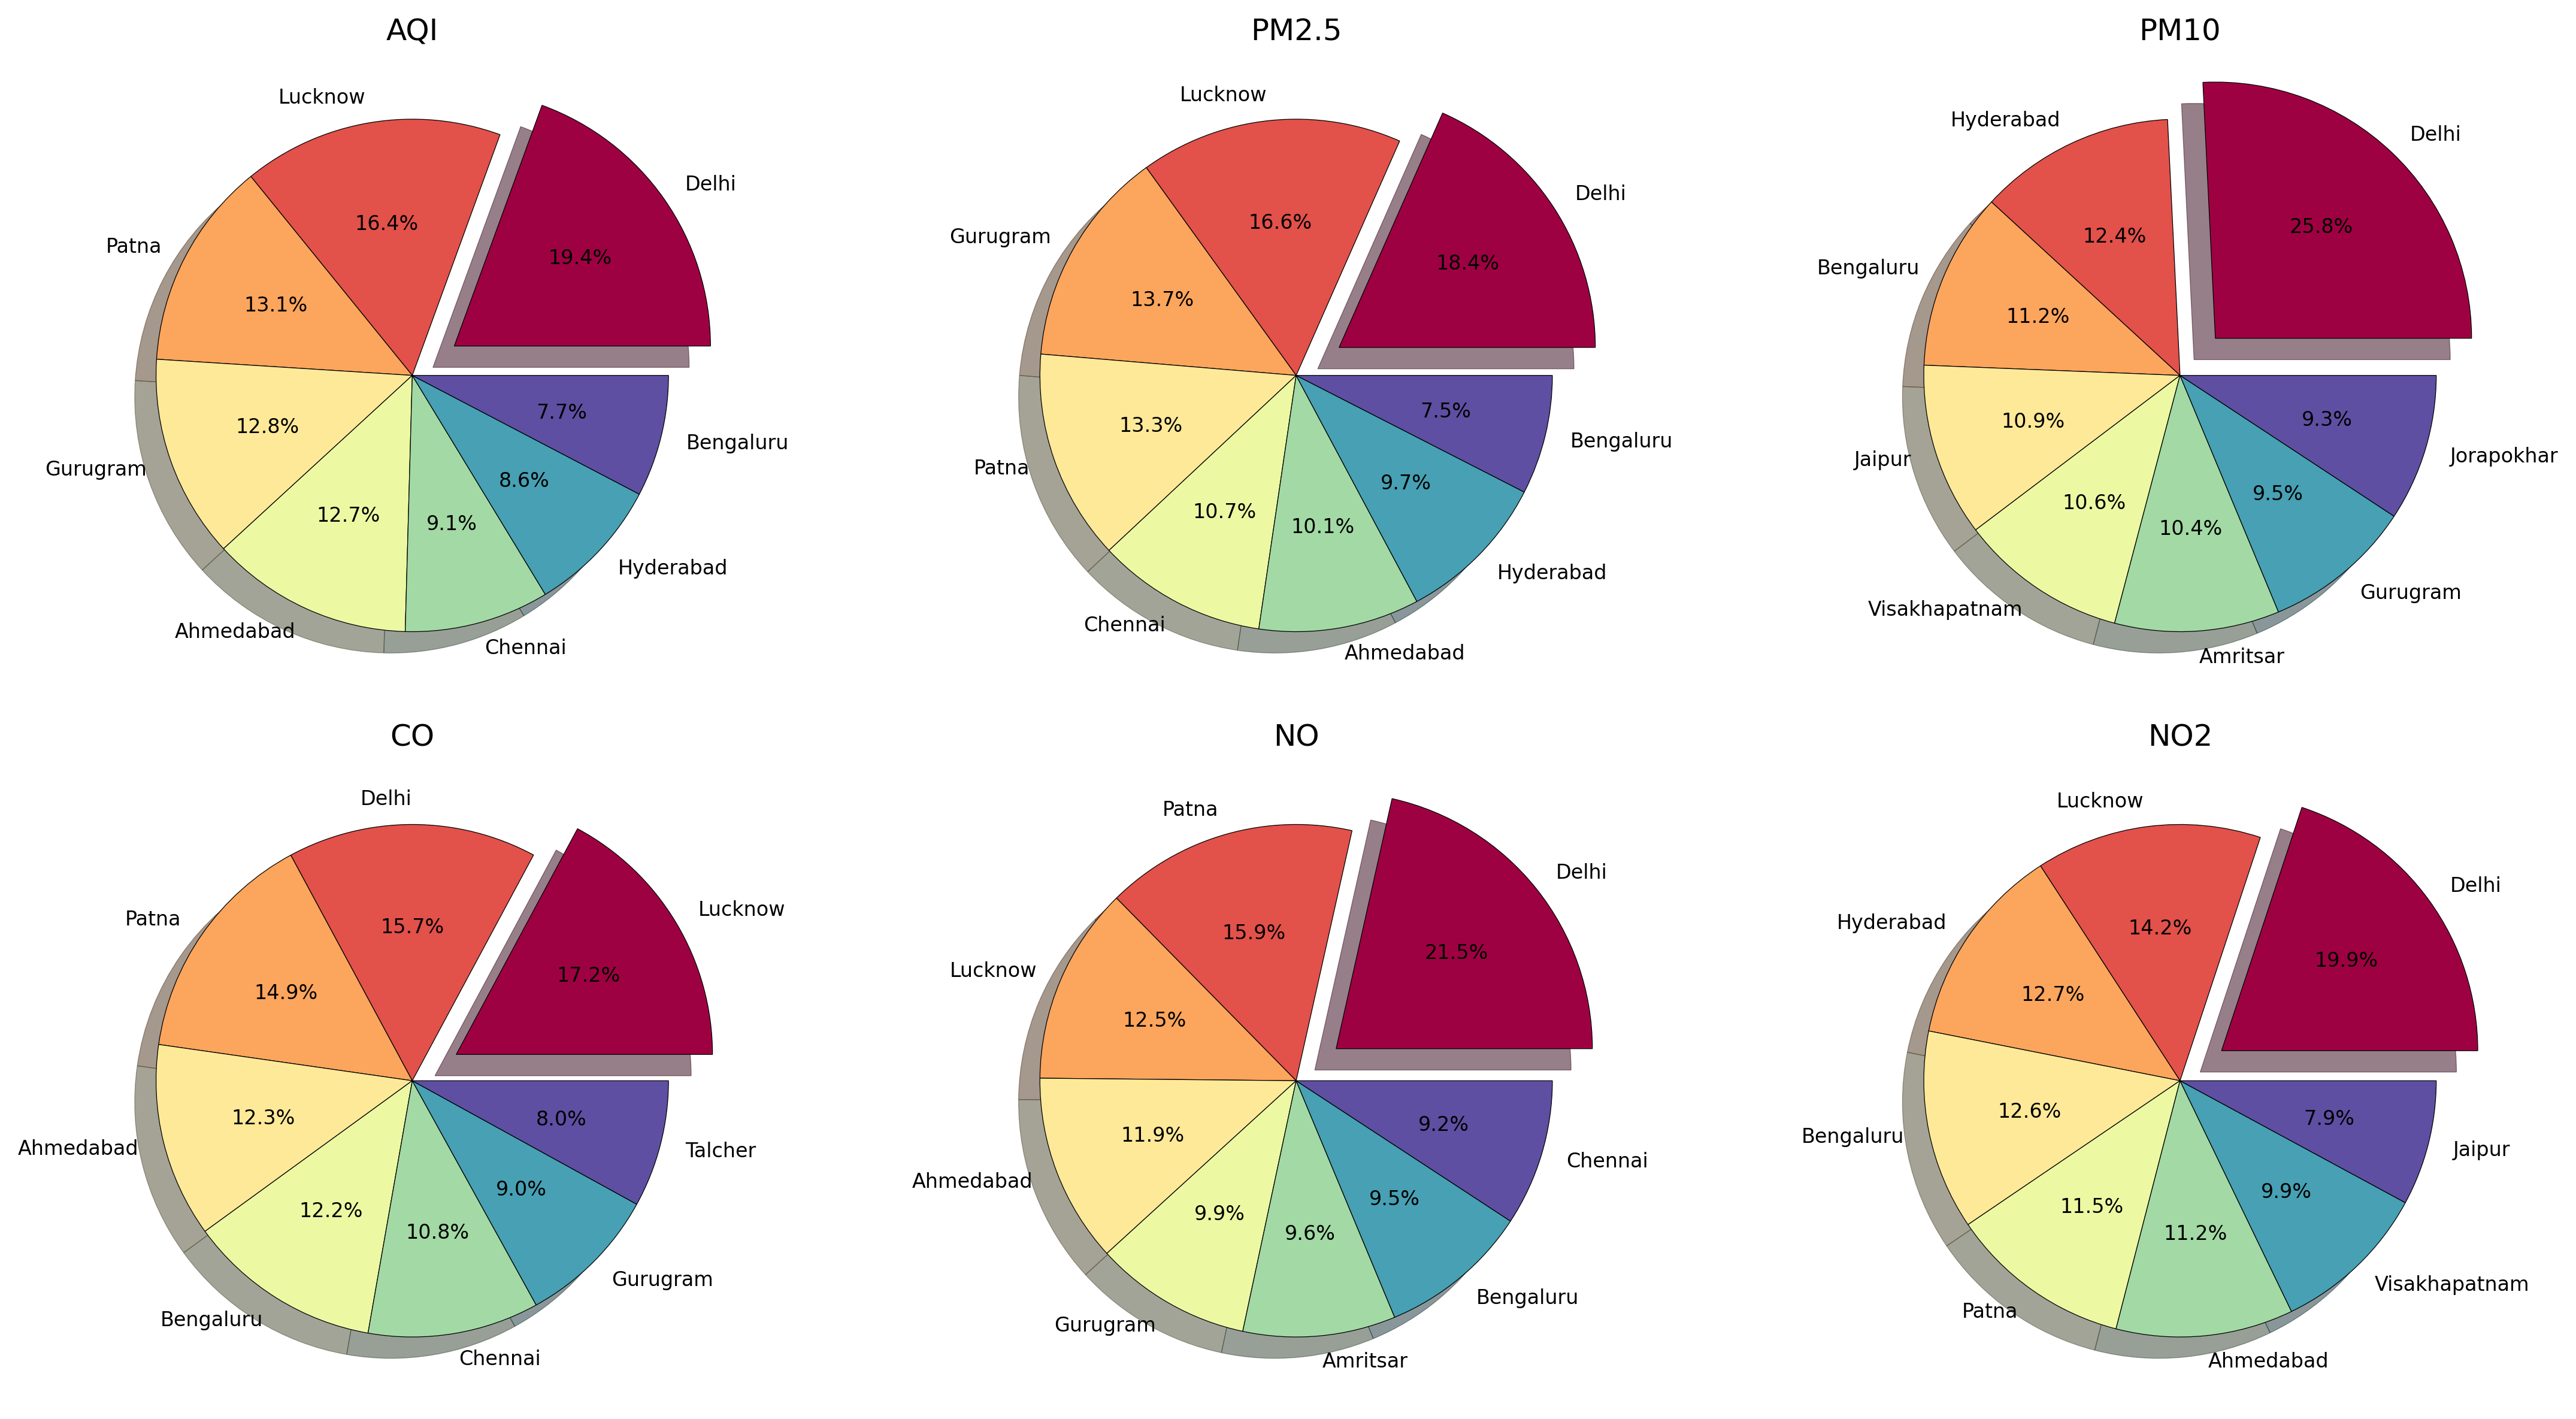

In [47]:
cols = ['AQI', 'PM2.5', 'PM10', 'CO', 'NO', 'NO2']

cmap = plt.get_cmap('Spectral')
color = [cmap(i) for i in np.linspace(0, 1, 8)]
explode = [0.2, 0, 0, 0, 0, 0, 0, 0]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), dpi=300)

axes = axes.flatten()

for ax, col in zip(axes, cols):
    # Group the cities and select the 8 cities with the highest total
    x = city_data.groupby('City')[col].sum().sort_values(ascending=False)
    x = x.reset_index('City')

    top_cities = x[:8]
    sizes = top_cities[col].values
    labels = top_cities['City'].tolist()

    # Pasta grafiği oluştur
    wedges, texts, autotexts = ax.pie(sizes, shadow=True, autopct='%1.1f%%',
                                      colors=color, explode=explode,
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 0.3},
                                      labels=labels)

    for text in texts:
        text.set_fontsize(8)

    for autotext in autotexts:
        autotext.set_fontsize(8)

    ax.set_title(f'{col}')

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In the pie charts above, the distribution of the top eight cities with high air pollution and the AQI value, as well as the independent variables that affect the AQI value the most, is shown separately by city. When the chart is examined in general, it is seen that the highest pollution belongs to Delhi in almost all charts. Since the other distributions are similar to each other, it can be said that the variables affect the AQI value linearly.

<ipython-input-48-ce3cb31ceb15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y='City', x='AQI', data=city_data, palette='Greens_d')
<ipython-input-48-ce3cb31ceb15>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], y='City', x='PM2.5', data=city_data, palette='Purples_d')
<ipython-input-48-ce3cb31ceb15>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], y='City', x='CO', data=city_data, palette='Blues_d')


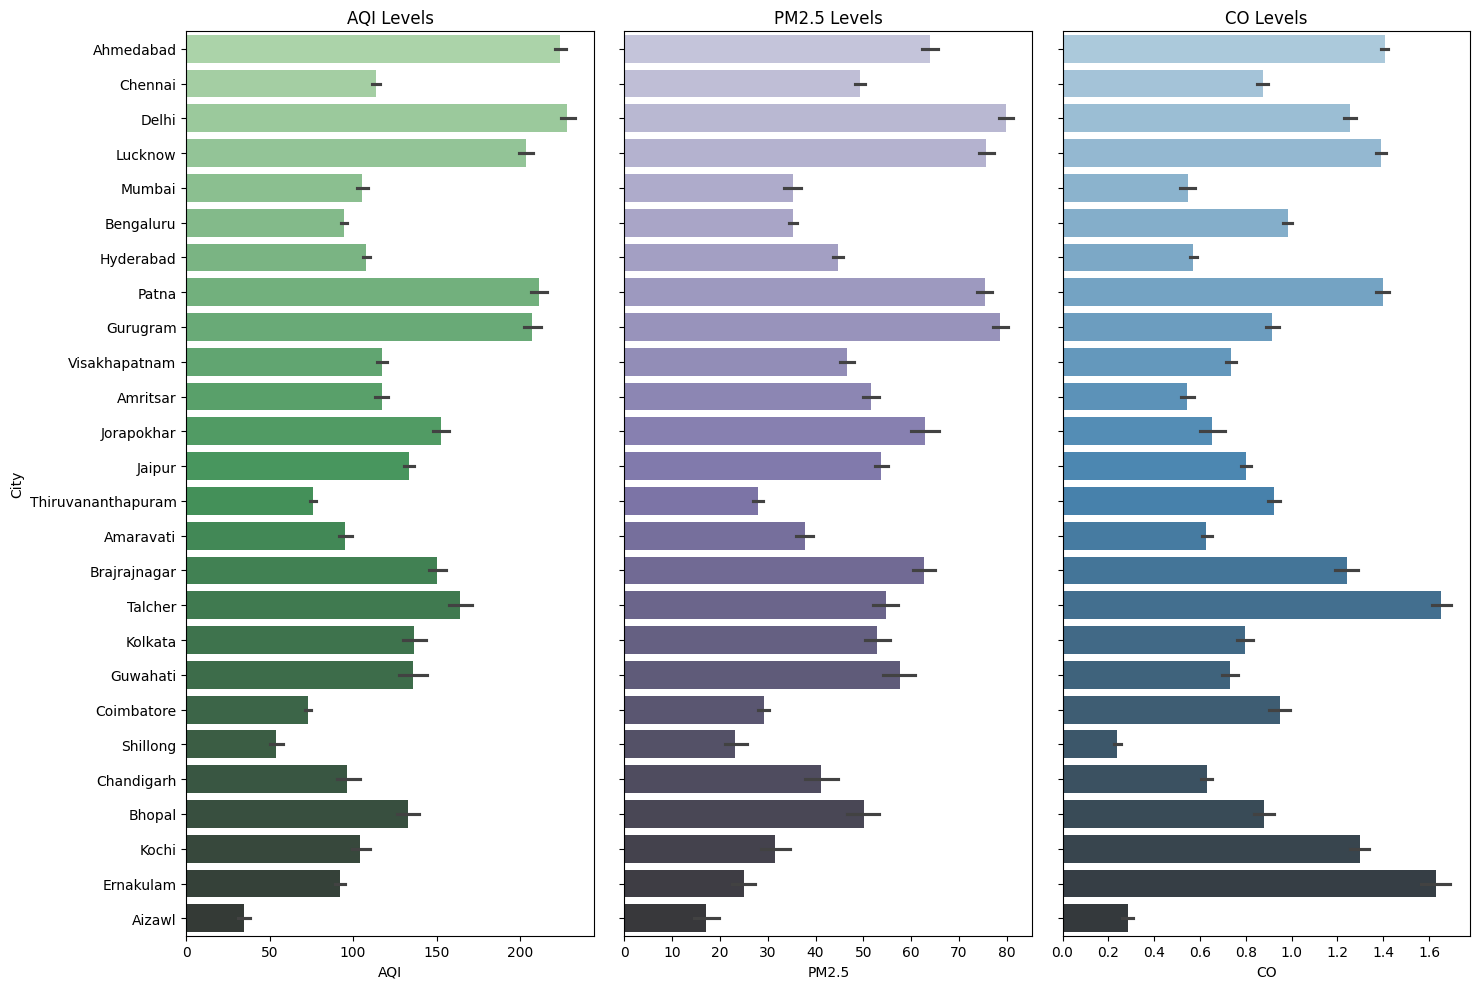

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

sns.barplot(ax=axes[0], y='City', x='AQI', data=city_data, palette='Greens_d')
axes[0].set_title('AQI Levels')

sns.barplot(ax=axes[1], y='City', x='PM2.5', data=city_data, palette='Purples_d')
axes[1].set_title('PM2.5 Levels')

sns.barplot(ax=axes[2], y='City', x='CO', data=city_data, palette='Blues_d')
axes[2].set_title('CO Levels')

plt.tight_layout()
plt.show()

In the line graphs here, the values ​​of the variables PM2.5 and CO, which are the two values ​​that affect the AQI and AQI values ​​of the cities in the data, are seen. In general, the length of the AQI bar increases according to PM2.5 and CO. Although some cities have lower CO values, higher PM2.5 values ​​have caused the AQI value to increase. From here, the superiority of the PM2.5 value over CO can be seen.

PREPARING THE DATA

Determining the numerical and categorical columns of the data set, filling the empty values ​​with scaler, applying onehotencoding to categorical data, separating the data set into training, test and validation data sets, determining the input and target columns of the data sets we separated

In [49]:
numeric_cols = df_full.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'Toluene',
 'AQI',
 'Year']

In [50]:
categorical_cols = df_full.select_dtypes(include=['object']).columns.tolist() # df_city_day'deki kategorik sütunların isimlerini bir liste olarak categorical_cols'a atadık.
categorical_cols

['City', 'AQI_Bucket']

In [51]:
full_columns=df_full.columns
full_columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'Toluene', 'AQI', 'AQI_Bucket', 'Year'],
      dtype='object')

In [52]:
# We assigned to input_cols from full_columns, excluding the last column from index 0 and 2.
input_cols = [full_columns[0]]+list(full_columns[2:-2])+ [full_columns[-1]]
# We set the target column as AQI.
target_col = 'AQI'

In [58]:
input_cols

['City',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'Toluene',
 'AQI',
 'Year']

In [59]:
from sklearn.model_selection import train_test_split
train_and_val_df, test_df = train_test_split(df_full, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(df_full, test_size=0.2)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (19880, 13)
val_df.shape : (4970, 13)
test_df.shape : (4970, 13)


In [60]:
train_df.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
9768,Chennai,2020-04-18,8.94,NaN,7.43,7.29,11.66,51.15,0.60,5.20,0.00,56.0,2020
9159,Chennai,2018-08-18,55.40,NaN,9.64,18.69,28.32,30.02,0.85,14.94,6.74,126.0,2018


In [61]:
train_df.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
9768,Chennai,2020-04-18,8.94,NaN,7.43,7.29,11.66,51.15,0.60,5.20,0.00,56.0,2020
9159,Chennai,2018-08-18,55.40,NaN,9.64,18.69,28.32,30.02,0.85,14.94,6.74,126.0,2018


In [62]:
train_inputs = train_df[input_cols].copy()# We copied the input_cols columns from the train_df DataFrame and assigned them to train_inputs
train_target = train_df[target_col].copy() # We copied the target_col columns from the train_df DataFrame and assigned them to train_target
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [63]:
train_inputs.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
9768,Chennai,8.94,NaN,7.43,7.29,11.66,51.15,0.60,5.20,0.00,56.0,2020
9159,Chennai,55.40,NaN,9.64,18.69,28.32,30.02,0.85,14.94,6.74,126.0,2018


In [64]:
train_target

,AQI
9768,56.0
9159,126.0
16188,119.0
14857,246.0
17703,135.0
...,...
20510,302.0
25614,125.0
21187,61.0
9997,84.0


In [65]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [66]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(strategy = 'mean') # We created an imputer object and specified that it fills empty values ​​with the average.
imputer.fit(df_full[numeric_cols]) # df_full trains the imputer using the numeric columns in the DataFrame and calculates the mean values ​​for each column.

SimpleImputer()

In [67]:
# The transform method transforms the missing values ​​in the training, test and validation sets using the mean values ​​learned with fit.
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [68]:
train_inputs[numeric_cols].isna().sum()

,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
Toluene,0
AQI,0


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler().fit(train_inputs[numeric_cols])# We created a scaler object and fit it with training data.
# Numerical columns in training, test and validation sets are standardized.
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [71]:
test_inputs.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,4970.0,0.005055,0.998765,-1.701540,-0.782724,-0.153067,0.765363,3.178301
PM10,4970.0,0.002457,1.010462,-2.075151,-0.668613,0.000833,0.373338,3.626520
NO,4970.0,-0.003653,1.008037,-1.410345,-0.756586,-0.302462,0.731335,3.266627
NO2,4970.0,-0.001080,0.998936,-1.551343,-0.833577,-0.190100,0.707972,3.040673
NOx,4970.0,0.001071,1.000953,-1.569916,-0.746022,-0.062864,0.645363,3.183456
NH3,4970.0,0.014857,1.012774,-1.687610,-0.741082,-0.000402,0.439960,3.563629
CO,4970.0,0.009776,1.006694,-1.747104,-0.697658,-0.092376,0.778534,3.234500
SO2,4970.0,-0.010742,1.008491,-1.781497,-0.791729,-0.193708,0.801261,3.332016
Toluene,4970.0,-0.008391,1.001301,-1.188032,-0.830036,-0.001665,0.453160,3.814782
AQI,4970.0,-0.002405,0.999295,-1.519445,-0.753676,-0.330789,0.697855,2.869438


In [72]:
df_full[categorical_cols].nunique()

,0
City,26


In [73]:
from sklearn.preprocessing import OneHotEncoder
# We created an encoder object. By default, sparse_output = True and the results are returned in a sparse format. If False is selected, a NumPy array is returned. handle_unknown = 'ignore' If unknown categories are encountered, no error is given and all zero values ​​are assigned for these categories.
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(df_full[categorical_cols])# We trained the encoder using the categorical columns in the df_full DataFrame.

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [74]:
encoder.categories_

[array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
        'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
        'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
        'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
        'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
        'Visakhapatnam'], dtype=object)]

In [75]:
# We converted the names of the one-hot encoded categorical columns created using the encoder object into a list.
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['City_Ahmedabad',
 'City_Aizawl',
 'City_Amaravati',
 'City_Amritsar',
 'City_Bengaluru',
 'City_Bhopal',
 'City_Brajrajnagar',
 'City_Chandigarh',
 'City_Chennai',
 'City_Coimbatore',
 'City_Delhi',
 'City_Ernakulam',
 'City_Gurugram',
 'City_Guwahati',
 'City_Hyderabad',
 'City_Jaipur',
 'City_Jorapokhar',
 'City_Kochi',
 'City_Kolkata',
 'City_Lucknow',
 'City_Mumbai',
 'City_Patna',
 'City_Shillong',
 'City_Talcher',
 'City_Thiruvananthapuram',
 'City_Visakhapatnam']

In [76]:
train_inputs.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
9768,Chennai,-1.430009,0.000833,-0.573353,-1.116443,-0.886172,2.641675,-0.702012,-0.887065,-1.188032,-1.039411,1.295728
9159,Chennai,0.006822,0.000833,-0.323387,-0.430708,0.090774,0.851153,-0.266557,0.801261,0.348840,-0.239354,-0.054187


In [77]:
# One-hot encodes categorical data and adds this encoded data to the dataset.
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [78]:
pd.set_option('display.max_columns', None)

In [79]:
test_inputs.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year,City_Ahmedabad,City_Aizawl,City_Amaravati,City_Amritsar,City_Bengaluru,City_Bhopal,City_Brajrajnagar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Gurugram,City_Guwahati,City_Hyderabad,City_Jaipur,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
11286,Delhi,0.785852,2.878023,2.514466,1.755823,2.543691,1.699384,0.952716,1.387148,1.541398,2.206534,-0.729144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,Thiruvananthapuram,-1.153219,-1.246401,-0.444411,-0.696581,-0.718461,-0.885137,0.517261,-0.344513,-0.001665,-0.787965,0.620771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

In [81]:
# We combined the numeric and one-hot encoded columns of the training, validation and test datasets.
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [82]:
# We made a prediction and filled the predictions with the average of the AQI column
def guess_mean(inputs):
    return np.full(len(inputs), df_full.AQI.mean())

In [83]:
guess_mean_train_r2_score=r2_score(guess_mean(X_train), train_target)
print("The error was calculated by assigning average values ​​to the prediction train_r2score: ", guess_mean_train_r2_score)
guess_mean_val_r2_score=r2_score(guess_mean(X_val), val_target)
print("The error was calculated by assigning average values ​​to the prediction val_r2score : ", guess_mean_val_r2_score)
guess_mean_test_r2_score=r2_score(guess_mean(X_test), test_target)
print("The error was calculated by assigning average values ​​to the prediction test_r2score: ", guess_mean_test_r2_score)

The error was calculated by assigning average values ​​to the prediction train_r2score:  -9.476632639512858e+30
The error was calculated by assigning average values ​​to the prediction val_r2score :  0.0
The error was calculated by assigning average values ​​to the prediction test_r2score:  0.0


In [84]:
# We made a prediction and filled the predictions with random value between the lowest and highest values ​​of AQI column.
def guess_random(inputs):
    lo, hi = df_full.AQI.min(), df_full.AQI.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [85]:
guess_random_train_r2_score=r2_score(guess_random(X_train), train_target)
print("The error was calculated by assigning random values ​​to the prediction train_r2_score: ", guess_random_train_r2_score)
guess_random_val_r2_score=r2_score(guess_random(X_val), val_target)
print("The error was calculated by assigning random values ​​to the prediction val_r2_score : ", guess_random_val_r2_score)
guess_random_test_r2_score=r2_score(guess_random(X_test), test_target)
print("The error was calculated by assigning random values ​​to the prediction test_r2_score : ", guess_random_test_r2_score)

The error was calculated by assigning random values ​​to the prediction train_r2_score:  -0.8885027889428414
The error was calculated by assigning random values ​​to the prediction val_r2_score :  -0.9193931339624279
The error was calculated by assigning random values ​​to the prediction test_r2_score :  -0.9165278960831025


The R² score for the train data indicates that the model’s ability to explain the variability in the air quality data is very low. This means that the model is not learning the relationships between air pollution and other air quality factors effectively.

If the R² scores for the training, validation, and test sets are all about the same negative value, it indicates that the model performed poorly on all three data sets, meaning that it was not overfitting or underfitting, but rather that the model was simply wrong.

In [86]:
results = []
#we created a dict where we create objects from different models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor' : SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'Lasso' : Lasso(),
    'SVR' :SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

In [87]:
def try_model(model,name):
    model.fit(X_train, train_target)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds=model.predict(X_test)

    # The R^2 score indicates how well the model predicted. A value close to 1 indicates that the model predicted perfectly.
    train_r2_score = r2_score(train_target, train_preds)
    val_r2_score= r2_score(val_target, val_preds)
    test_r2_score = r2_score(test_target, test_preds)

    print(f"{name} Model:")
    print("Train r2_score : ", train_r2_score)
    print("Validation r2_score : ", val_r2_score)
    print("Test r2_score : ", test_r2_score)
    print("-" * 40)
    # We add the name of each model and the scores of that model to the result list.
    results.append({'Model': name, 'Train R2 Score': train_r2_score, 'Validation R2 Score': val_r2_score, 'Test R2 Score': test_r2_score})

In [88]:
# Train and test each model
for name, model in models.items():
    try_model(model,name)

LinearRegression Model:
Train r2_score :  1.0
Validation r2_score :  1.0
Test r2_score :  1.0
----------------------------------------
Ridge Model:
Train r2_score :  0.999999991306551
Validation r2_score :  0.9999999911195809
Test r2_score :  0.9999999912239363
----------------------------------------
SGDRegressor Model:
Train r2_score :  0.9999981677554441
Validation r2_score :  0.9999981631852968
Test r2_score :  0.9999981561567306
----------------------------------------
ElasticNet Model:
Train r2_score :  0.9003559124347998
Validation r2_score :  0.9009714726521146
Test r2_score :  0.9002585707004689
----------------------------------------
Lasso Model:
Train r2_score :  0.9998693692050278
Validation r2_score :  0.9998693691622632
Test r2_score :  0.9998693684483095
----------------------------------------
SVR Model:
Train r2_score :  0.9999996255176525
Validation r2_score :  0.999999622607865
Test r2_score :  0.999999624092474
----------------------------------------
GradientBoost

According to the results obtained, the R² values ​​of the Linear Regression, Ridge, and SGDRegressor models on the training, validation, and test sets are quite close to each other. This similarity shows that the prediction performances of these models on the data are quite close to each other and do not adequately reflect the complexity of our dataset. Therefore, these models do not seem to have sufficient learning and prediction capacity on the data.

The performance of the Lasso and SVR models is characterized by lower R² values ​​compared to the other models. Low values ​​indicate that these models are not suitable for our dataset and their prediction performance is weaker than the other models.

On the other hand, the performance of the GradientBoostingRegressor model is quite impressive. These results show that the learning and prediction capacities of the GradientBoostingRegressor model on the data are much higher than the other models and that it understands the data more effectively.

In [89]:
%%time
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42)
try_model(tree,name="DecisionTreeRegressor")

DecisionTreeRegressor Model:
Train r2_score :  1.0
Validation r2_score :  0.9999999469851828
Test r2_score :  0.999999973673734
----------------------------------------
CPU times: user 278 ms, sys: 0 ns, total: 278 ms
Wall time: 289 ms


Train R² Score: A nearly perfect R² score (around 1) on the training data indicates that your decision tree model is a very good fit to the data it was trained on, but this is usually a sign of overfitting. The model captured all the variance and patterns in the training data, but this also means that the model can adapt to noise.

Validation R² Score: The R² score obtained on the validation set indicates that the model performed poorly compared to the training data. This indicates that the model is not resilient to new data due to overfitting. The model has difficulty explaining variances that it has not encountered before on the validation set. While an accuracy of 70.41% is generally a good score for decision trees, it falls short of expectations for the trained model.

Test R² Score: The R² score obtained on the test set is used to evaluate the performance of the model on new data. An R² score of 93.36% indicates that the model provides adequate overall performance on the data set. While it does indicate overfitting on the training set, its performance on the test set is not too bad. However, the fact that it performs better on the test set compared to the validation set may indicate that the model is still resilient to some new data.

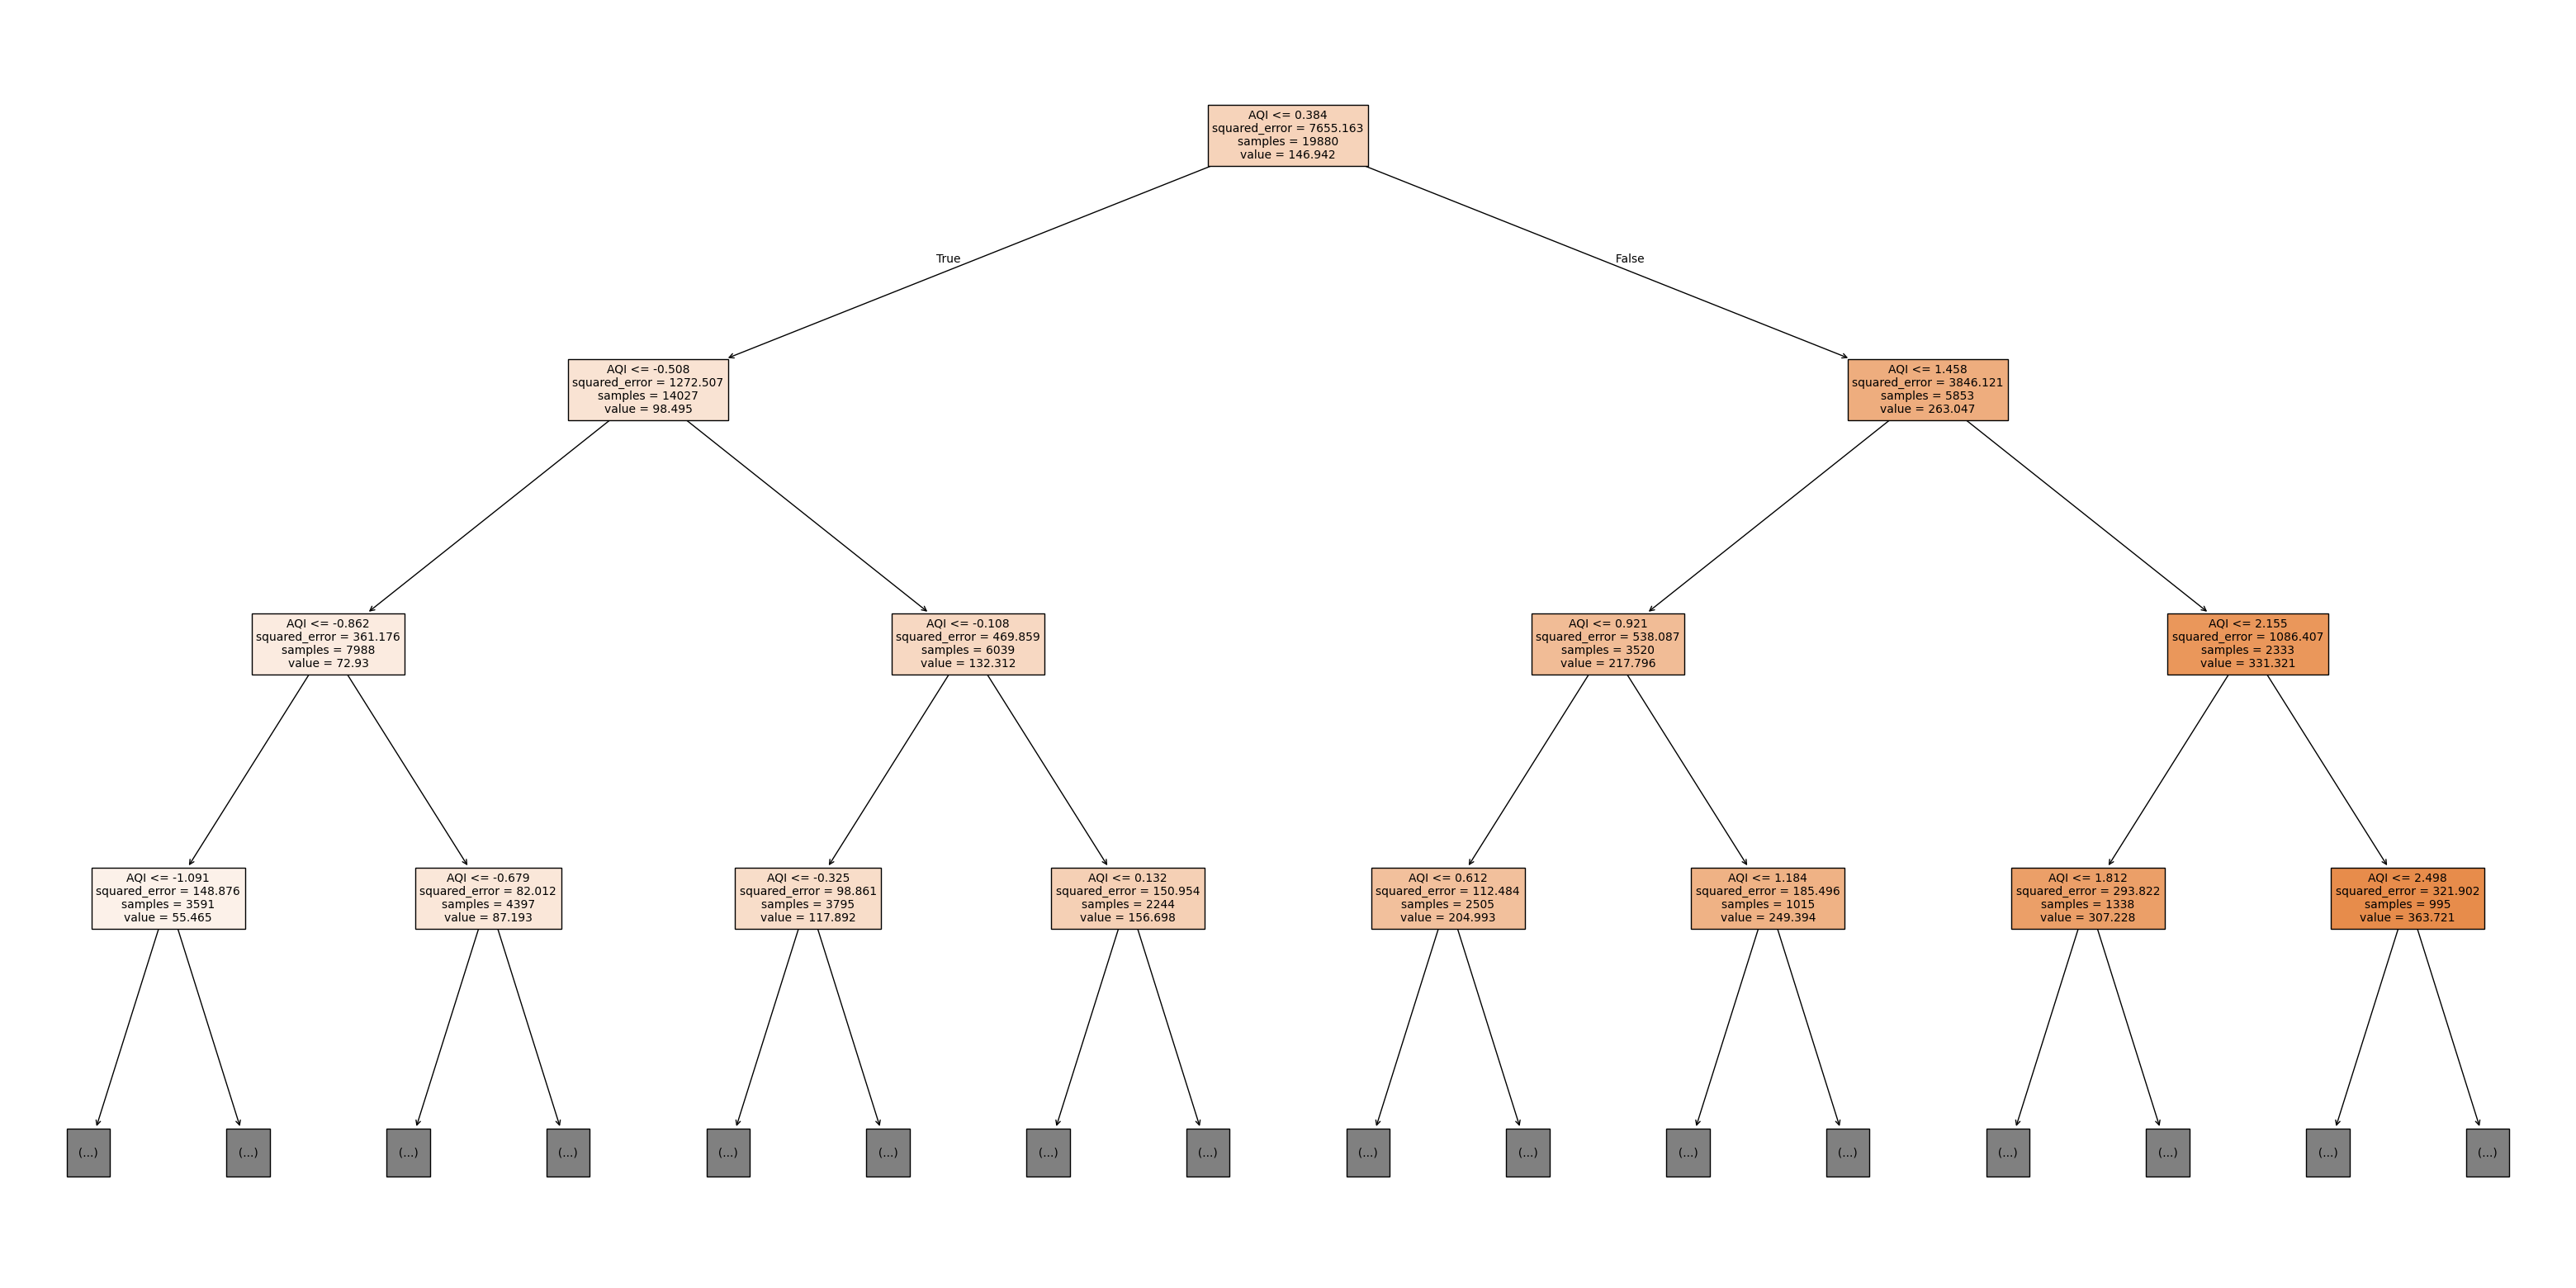

In [90]:
plt.figure(figsize=(40, 20))
# The max_depth=3 parameter specifies 3 depth levels, filled=True makes the tree nodes colored, the feature_names=numeric_cols+encoded_cols parameter specifies the feature names.
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

In [91]:
%%time
# Makes predictions using a forest of decision trees. The n_jobs=-1 parameter specifies the number of cores to be used in training the model. -1 ensures that all cores are used and the model training can be completed in a shorter time.
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf,name="RandomForestRegressor")

RandomForestRegressor Model:
Train r2_score :  0.9999999944777606
Validation r2_score :  0.9999999443874568
Test r2_score :  0.9999999706462134
----------------------------------------
CPU times: user 17.7 s, sys: 25.8 ms, total: 17.8 s
Wall time: 18.2 s


The R² score on the training dataset was obtained as 97.91%. This indicates that the model was able to explain a large portion of the variance of the target variable in the training data, i.e. 97.91%. In other words, the model predicted the air quality variables in the training data correctly for the most part and was able to capture a large portion of the data meaningfully.

The R² score on the validation set was obtained as 84.68%. This indicates that the model successfully explained 84.68% of the target variable in the validation dataset. Despite the high performance on the training data, the model also showed a strong performance on the validation data, indicating that it has good generalization ability and can continue its success on the training data to other data.

The R² score on the test dataset was obtained as 94.67%. This indicates that the model was able to explain 94.67% of the target variable in the test data. The model has also shown high success on new data that it has not seen before, indicating that the model provides strong accuracy in air quality predictions and is effective on new data.

In [92]:
rf.feature_importances_

array([6.63495351e-10, 1.17060610e-08, 2.22238694e-09, 2.38032126e-09,
       6.48352334e-10, 7.71291241e-09, 2.77177247e-09, 3.28400951e-09,
       2.02531684e-09, 9.99999966e-01, 5.23156903e-10, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.76104779e-10, 4.45260760e-11, 1.09036308e-10, 0.00000000e+00,
       0.00000000e+00])

In [93]:
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
9,AQI,1.000000e+00
1,PM10,1.170606e-08
5,NH3,7.712912e-09
7,SO2,3.284010e-09
6,CO,2.771772e-09
3,NO2,2.380321e-09
2,NO,2.222387e-09
8,Toluene,2.025317e-09
0,PM2.5,6.634954e-10
4,NOx,6.483523e-10


In [96]:
GBR = GradientBoostingRegressor()
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [97]:
# We used RandomizedSearchCV to optimize the hyperparameters of the GradientBoostingRegressor model
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=GBR,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

randomized_search.fit(X_train, train_target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=1)

In [101]:
# We used RandomizedSearchCV to optimize the hyperparameters of the GradientBoostingRegressor model
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=GBR,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

randomized_search.fit(X_train, train_target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=1)

In [99]:
print("Best Hyperparameters :", randomized_search.best_params_)
print("Best Score :", randomized_search.best_score_)

Best Hyperparameters : {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.1}
Best Score : 0.9999999625125131


In [102]:
results_df = pd.DataFrame(results)

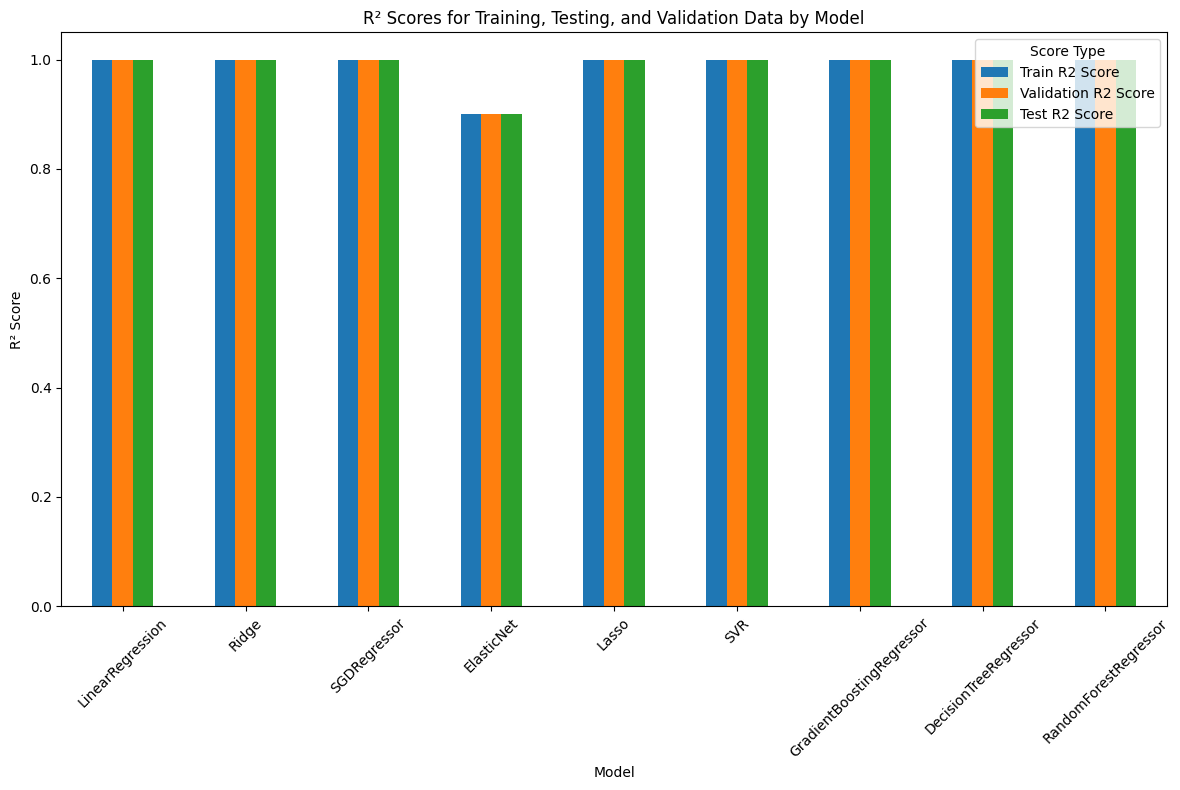

In [103]:
# Visualizing the results
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('R² Scores for Training, Testing, and Validation Data by Model')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.legend(title='Score Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures that all elements (axis labels, titles, subtitles, etc.) are properly placed within the figure area.
plt.show()